# SYSC4906 Assignment 3

**Group Name: Simon and Rachel** 

**Student names: Simon Dewilde & Rachel Myrah**

**Student numbers: 101004413 & 101002836** 


# Discussion of Solution
We used a convolutional neural network, specifically the Keras Xception model, we retrained the model. We split our data into training and test sets using a 90-10 split. We retrained the Xception model, using our 90% training set, which resulted in a much higher prediction accuracy than when we tried to use transfer learning. We applied several transformations to the training images, including width_shift, height_shift, rotation, zoom, and vertical_flip. The values used for these transformations were initially determined by thinking of which transformations could result in an image that is different, but that still resembles a valid image that could be taken of these buildings. An example of this is in the vertical_flip transformation. We reasoned that a vertically flipped image would produce a valid building image, but that a horizontally flipped image would not be helpful, because we will not be testing with any upside-down building images.

We estimated our future performance based on how well our model predicted labels for the 10% validation set. We calculated the recall, precision, and accuracy for each building label by interpreting the predictions as one vs rest, so that we can count the total number of False Positives and True Positives, and use these with the total number of images for each building to calculate the above metrics for each. Using these calculated values, we can make an estimate for which will have the highest/lowest values of these in the future. From our model, we came up with the following predictions:
            Building with worst recall: AA
            Building with best precision: FH
            Overall accuracy: 0.9696

[Precision Recall Plot](https://github.com/wsimond49/Carleton_Building_Identification_ML/blob/master/Precision_Recall.png)

We determined which buildings did the best and worst overall by making a precision recall curve and plotting each building to see which were closest and furthest from the optimal spot in the top right corner. The buildings that did the best were DT, RO, and LB. This is likely because these buildings all have a distinct pattern which looks the same from every angle of the building. The buildings that our model did the worst on were CB, MC, AA, and CT. This is likely because these buildings are either easily mistaken for other buildings (CB and CT), or because they look very different from different angles (MC and AA), which may confuse the model. More specifically, CB and MC had high recall, but low precision, which means that it had a lot of True and False Positives. This indicates that other buildings are very often mistaken for CB or MC. CT and AA had high precision, and low recall, which means that it had few True and False Positives. This indicates that the model rarely thought that any building was CT or AA, whether it was or not. These best and worst buildings highlight the strengths and limitations of our model. The strengths are its ability to identify buildings with consistent exteriors, and the limitations are its inability to identify buildings with very similar appearances as another building, or with inconsistent exteriors.
 
If we had more time, we would have done more tests to find the optimal values for the preprocessing transformations of training images. It is possible that the training would have benefitted from some of the transformations being more/less drastic, but in our testing we did not have time to try changing one at a time and retraining the model to see the difference that each individual change makes. With more time we could also try training using more methods of optimization to see if any are better suited to this task.

See the last section of our trainModel notebook for a log of tests completed and the output of our best model training.



#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
import os

buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global model
  !wget https://github.com/wsimond49/Carleton_Building_Identification_ML/blob/master/carleton-buildings-xception-model.hdf5?raw=true
  if os.path.exists("carleton-buildings-xception-model.hdf5?raw=true"):
    model = load_model("carleton-buildings-xception-model.hdf5?raw=true")
  else:
    print("MODEL WAS NOT DOWNLOADED CORRECTLY FROM GITHUB")
    print("Download model from github.com/wsimond49/Carleton_Building_Identification_ML")
    print("Upload it here and rename it as carleton-buildings-xception-model.hdf5?raw=true")
    exit(1)

Using TensorFlow backend.


## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
def classifyImage(fname):
  global model 
  image = Image.open(fname)
  image = image.resize((299, 299), Image.ANTIALIAS)
  image = np.asarray(image)
  image = image.astype('float32')
  image = image/255
  prediction = model.predict(np.expand_dims(image, axis=0))[0].tolist()
  return buildingCodes[prediction.index(max(prediction))]


## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return "AA"

## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return "FH"


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 0.9696

# Test required functions
_We will replace the text below with our actual test code..._

--2019-12-02 23:01:52--  https://github.com/wsimond49/Carleton_Building_Identification_ML/blob/master/carleton-buildings-xception-model.hdf5?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wsimond49/Carleton_Building_Identification_ML/raw/master/carleton-buildings-xception-model.hdf5 [following]
--2019-12-02 23:01:53--  https://github.com/wsimond49/Carleton_Building_Identification_ML/raw/master/carleton-buildings-xception-model.hdf5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/wsimond49/Carleton_Building_Identification_ML/master/carleton-buildings-xception-model.hdf5 [following]
--2019-12-02 23:01:53--  https://media.githubusercontent.com/media/wsimond49/Carleton_Building_Identification_ML/master/carleton-buildings-xception-mo

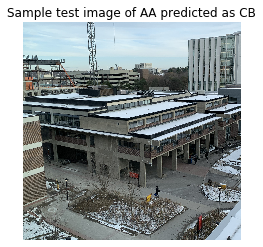

Incorrect...


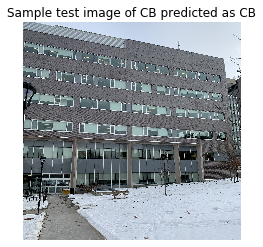

Correct!


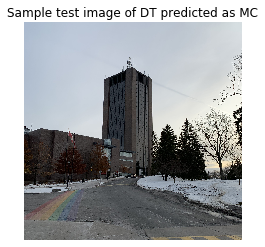

Incorrect...


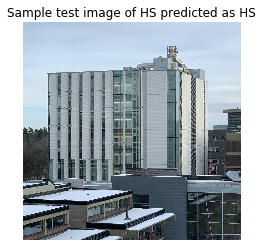

Correct!
Expected that worst recall would be on AA
Expected that best precision would be on FH
Expected total accuracy would be 0.970
Actual total accuracy is 0.500


In [6]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
